In [1]:

# Creating a mortgage payoff schedule serves several purposes:

#  Understanding Payment Structure: It helps borrowers understand how their mortgage payments are structured over time. 
#  By breaking down each payment into principal and interest components, borrowers can see how much of each payment goes towards reducing 
#  the loan balance (principal) and how much goes towards paying the lender for borrowing the money (interest).

#  Financial Planning: A payoff schedule enables borrowers to plan their finances effectively. They can anticipate future payments, 
#  budget accordingly, and make informed decisions about their mortgage and other financial commitments.

#  Tracking Progress: The schedule allows borrowers to track their progress in paying off the loan. They can see how the remaining 
#  balance decreases over time and how much equity they are building in their home.

#  Comparing Loan Options: When shopping for a mortgage or considering refinancing options, having a payoff schedule can help borrowers 
#  compare different loan terms and interest rates. They can assess the total cost of borrowing and choose the option that best fits their 
#  financial goals.

#  Early Payoff Strategies: For borrowers interested in paying off their mortgage early, a payoff schedule provides insights into how 
#  extra payments or refinancing options can accelerate the payoff timeline and reduce overall interest costs.

        
# Input Variables:
#  Principal: The total loan amount.
#  Annual Rate: The annual interest rate as a percentage.
#  Years: The loan term in years.
#  Start Date: The date from which the payments start.

# Data Generation:
# The payoff schedule is generated based on the input values, computing the monthly payment details and storing them in a DataFrame.


In [68]:

import pandas as pd
import datetime
import plotly.graph_objs as go
#pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', 1000) 

def calculate_monthly_payment(principal, annual_rate, years):
    monthly_rate = annual_rate / 12 / 100
    number_of_payments = int(years * 12)
    monthly_payment = principal * (monthly_rate * (1 + monthly_rate)**number_of_payments) / ((1 + monthly_rate)**number_of_payments - 1)
    return monthly_payment

def generate_payoff_schedule(principal, annual_rate, years, start_date=None):
    monthly_payment = calculate_monthly_payment(principal, annual_rate, years)
    monthly_rate = annual_rate / 12 / 100
    number_of_payments = (years * 12)
    
    balance = principal
    cumulative_interest = 0  # Initialize cumulative interest
    schedule = []
    
    for i in range(number_of_payments):
        interest = balance * monthly_rate
        principal_payment = monthly_payment - interest
        balance -= principal_payment
        cumulative_interest += interest  # Add the current month's interest to the cumulative interest
        
        if start_date:
            payment_date = start_date + pd.DateOffset(months=i)
        else:
            payment_date = f"Month {i+1}"
        
        schedule.append({
            "Payment Date": payment_date,
            "Payment": f"${monthly_payment:,.2f}",
            "Principal Payment": f"${principal_payment:,.2f}",
            "Interest Payment": f"${interest:,.2f}",
            "Cumulative Interest": f"${cumulative_interest:,.2f}",
            "Remaining Balance": f"${balance:,.2f}"
        })
    
    return pd.DataFrame(schedule)

def calculate_investment_value(principal, annual_rate, years):
    return principal * (1 + annual_rate / 100) ** years

# Input variables
principal = float(input('Enter your loan amount: '))  # Loan amount
annual_rate = float(input('Enter your annual interest rate: '))  # Annual interest rate in percentage
years = int(input('Enter your mortgage term in years (30, 15, etc.): '))  # Loan term in years
date_entry = input('Enter a date in YYYY-MM-DD format: ')
year, month, day = map(int, date_entry.split('-'))
start_date = datetime.date(year, month, day)

# Generate payoff schedule without prepayment
schedule_no_prepay = generate_payoff_schedule(principal, annual_rate, years, start_date)
print(schedule_no_prepay)


Enter your loan amount:  850000
Enter your annual interest rate:  2.875
Enter your mortgage term in years (30, 15, etc.):  30
Enter a date in YYYY-MM-DD format:  2024-05-01


    Payment Date    Payment Principal Payment Interest Payment Cumulative Interest Remaining Balance
0     2024-05-01  $3,526.59         $1,490.13        $2,036.46           $2,036.46       $848,509.87
1     2024-06-01  $3,526.59         $1,493.70        $2,032.89           $4,069.35       $847,016.17
2     2024-07-01  $3,526.59         $1,497.28        $2,029.31           $6,098.66       $845,518.90
3     2024-08-01  $3,526.59         $1,500.86        $2,025.72           $8,124.38       $844,018.03
4     2024-09-01  $3,526.59         $1,504.46        $2,022.13          $10,146.51       $842,513.57
5     2024-10-01  $3,526.59         $1,508.06        $2,018.52          $12,165.03       $841,005.51
6     2024-11-01  $3,526.59         $1,511.68        $2,014.91          $14,179.94       $839,493.83
7     2024-12-01  $3,526.59         $1,515.30        $2,011.29          $16,191.22       $837,978.54
8     2025-01-01  $3,526.59         $1,518.93        $2,007.66          $18,198.88       $8

Enter your loan amount:  850000
Enter your annual interest rate:  2.875
Enter your mortgage term in years (30, 15, etc.):  30
Enter a start date in YYYY-MM-DD format:  2024-05-01


    Payment Date  Payment  Principal Payment  Interest Payment  Cumulative Interest  Remaining Balance
0     2024-05-01  3526.59            1490.13           2036.46              2036.46          848509.87
1     2024-06-01  3526.59            1493.70           2032.89              4069.35          847016.17
2     2024-07-01  3526.59            1497.28           2029.31              6098.66          845518.90
3     2024-08-01  3526.59            1500.86           2025.72              8124.38          844018.03
4     2024-09-01  3526.59            1504.46           2022.13             10146.51          842513.57
5     2024-10-01  3526.59            1508.06           2018.52             12165.03          841005.51
6     2024-11-01  3526.59            1511.68           2014.91             14179.94          839493.83
7     2024-12-01  3526.59            1515.30           2011.29             16191.22          837978.54
8     2025-01-01  3526.59            1518.93           2007.66           

Enter your prepayment amount:  50000
Enter the year from now when you will make the prepayment:  6


    Payment Date  Payment  Principal Payment  Interest Payment  Cumulative Interest  Remaining Balance
0     2030-05-01  3286.05            1649.56           1636.48              1636.48          681404.16
1     2030-06-01  3286.05            1653.51           1632.53              3269.01          679750.64
2     2030-07-01  3286.05            1657.48           1628.57              4897.58          678093.17
3     2030-08-01  3286.05            1661.45           1624.60              6522.18          676431.72
4     2030-09-01  3286.05            1665.43           1620.62              8142.80          674766.29
5     2030-10-01  3286.05            1669.42           1616.63              9759.43          673096.87
6     2030-11-01  3286.05            1673.42           1612.63             11372.05          671423.46
7     2030-12-01  3286.05            1677.43           1608.62             12980.67          669746.03
8     2031-01-01  3286.05            1681.45           1604.60           

Enter the expected annual return rate for the investment (6-8%):  6


##################################################
Interest saved by prepaying the mortgage: $156,243.59
Future value of investing $50,000.00 at 6.0% for 24 years: $202,446.73
Put your money in the market. Do not prepay your mortgage.


C:\Users\ryan_\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



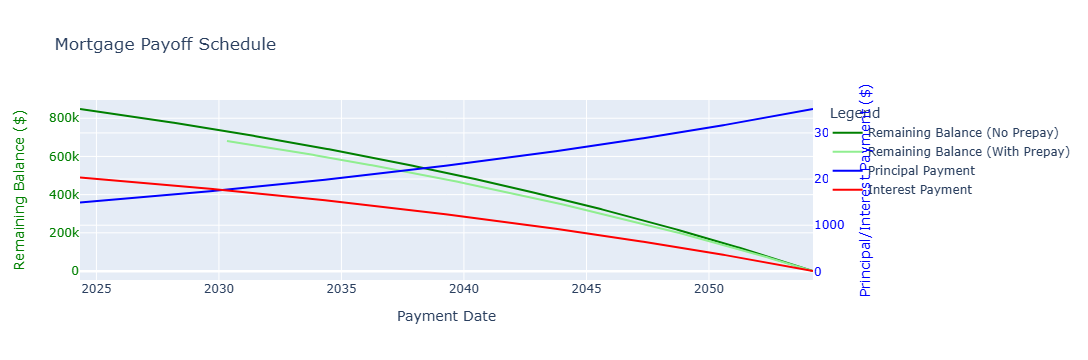

In [75]:

import pandas as pd
import datetime
import plotly.graph_objs as go

def calculate_monthly_payment(principal, annual_rate, years):
    monthly_rate = annual_rate / 12 / 100
    number_of_payments = int(years * 12)
    monthly_payment = principal * (monthly_rate * (1 + monthly_rate)**number_of_payments) / ((1 + monthly_rate)**number_of_payments - 1)
    return monthly_payment

def generate_payoff_schedule(principal, annual_rate, years, start_date=None):
    monthly_payment = calculate_monthly_payment(principal, annual_rate, years)
    monthly_rate = annual_rate / 12 / 100
    number_of_payments = int(years * 12)
    
    balance = principal
    cumulative_interest = 0
    schedule = []
    
    for i in range(number_of_payments):
        interest = balance * monthly_rate
        principal_payment = monthly_payment - interest
        balance -= principal_payment
        cumulative_interest += interest
        
        if start_date:
            payment_date = start_date + pd.DateOffset(months=i)
        else:
            payment_date = f"Month {i+1}"
        
        schedule.append({
            "Payment Date": payment_date,
            "Payment": round(monthly_payment, 2),
            "Principal Payment": round(principal_payment, 2),
            "Interest Payment": round(interest, 2),
            "Cumulative Interest": round(cumulative_interest, 2),
            "Remaining Balance": round(balance, 2)
        })
    
    return pd.DataFrame(schedule)

def calculate_investment_value(principal, annual_rate, years):
    return principal * (1 + annual_rate / 100) ** years

# Input variables
principal = float(input('Enter your loan amount: '))  # Loan amount
annual_rate = float(input('Enter your annual interest rate: '))  # Annual interest rate in percentage
years = int(input('Enter your mortgage term in years (30, 15, etc.): '))  # Loan term in years
date_entry = input('Enter a start date in YYYY-MM-DD format: ')
year, month, day = map(int, date_entry.split('-'))
start_date = datetime.date(year, month, day)

# Generate payoff schedule without prepayment
schedule_no_prepay = generate_payoff_schedule(principal, annual_rate, years, start_date)
print(schedule_no_prepay)

# Prepayment details
prepay_amount = float(input('Enter your prepayment amount: '))
prepay_year = int(input('Enter the year from now when you will make the prepayment: '))
prepay_months = prepay_year * 12

# Generate payoff schedule with prepayment
if prepay_months < len(schedule_no_prepay):
    # Balance just before prepayment
    balance_before_prepay = schedule_no_prepay.at[prepay_months - 1, 'Remaining Balance']
    balance_after_prepay = balance_before_prepay - prepay_amount
    
    # Adjust the calculation of remaining years after prepayment
    remaining_years_after_prepay = years - prepay_year  # Adjust for prepayment in years
    schedule_with_prepay = generate_payoff_schedule(balance_after_prepay, annual_rate, remaining_years_after_prepay, start_date + pd.DateOffset(months=prepay_months))
    print(schedule_with_prepay)
    
    # Calculate interest saved by prepaying the mortgage
    interest_no_prepay = schedule_no_prepay["Interest Payment"].sum()
    interest_with_prepay = schedule_with_prepay["Interest Payment"].sum()
    interest_saved = interest_no_prepay - interest_with_prepay

    # Investment details
    investment_rate = float(input('Enter the expected annual return rate for the investment (6-8%): '))
    investment_years = years - prepay_year  # Investment period starts after the bonus is received
    investment_value = calculate_investment_value(prepay_amount, investment_rate, investment_years)

    print('#' * 50)
    # Print summary
    print(f"Interest saved by prepaying the mortgage: ${interest_saved:,.2f}")
    print(f"Future value of investing ${prepay_amount:,.2f} at {investment_rate}% for {investment_years} years: ${investment_value:,.2f}")


    if interest_saved < investment_value:
        print('Put your money in the market. Do not prepay your mortgage.')
    else:
        print('Prepay your mortgage. Do not put your money in the market.')
        
else:
    print("Error: The prepayment year exceeds the mortgage term.")

# Plotting with Plotly
fig = go.Figure()

# Add Remaining Balance trace (without prepayment)
fig.add_trace(go.Scatter(
    x=schedule_no_prepay['Payment Date'],
    y=schedule_no_prepay['Remaining Balance'],
    mode='lines',
    name='Remaining Balance (No Prepay)',
    line=dict(color='green')
))

# Add Remaining Balance trace (with prepayment)
if prepay_months < len(schedule_no_prepay):
    fig.add_trace(go.Scatter(
        x=schedule_with_prepay['Payment Date'],
        y=schedule_with_prepay['Remaining Balance'],
        mode='lines',
        name='Remaining Balance (With Prepay)',
        line=dict(color='lightgreen')
    ))

# Add Principal Payment trace
fig.add_trace(go.Scatter(
    x=schedule_no_prepay['Payment Date'],
    y=schedule_no_prepay['Principal Payment'],
    mode='lines',
    name='Principal Payment',
    yaxis='y2',
    line=dict(color='blue')
))

# Add Interest Payment trace
fig.add_trace(go.Scatter(
    x=schedule_no_prepay['Payment Date'],
    y=schedule_no_prepay['Interest Payment'],
    mode='lines',
    name='Interest Payment',
    yaxis='y2',
    line=dict(color='red')
))

# Update layout to add secondary y-axis
fig.update_layout(
    title='Mortgage Payoff Schedule',
    xaxis_title='Payment Date',
    yaxis=dict(
        title='Remaining Balance ($)',
        titlefont=dict(color='green'),
        tickfont=dict(color='green')
    ),
    yaxis2=dict(
        title='Principal/Interest Payment ($)',
        titlefont=dict(color='blue'),
        tickfont=dict(color='blue'),
        overlaying='y',
        side='right'
    ),
    legend_title='Legend',
    hovermode='x unified'
)

# Show plot
fig.show()


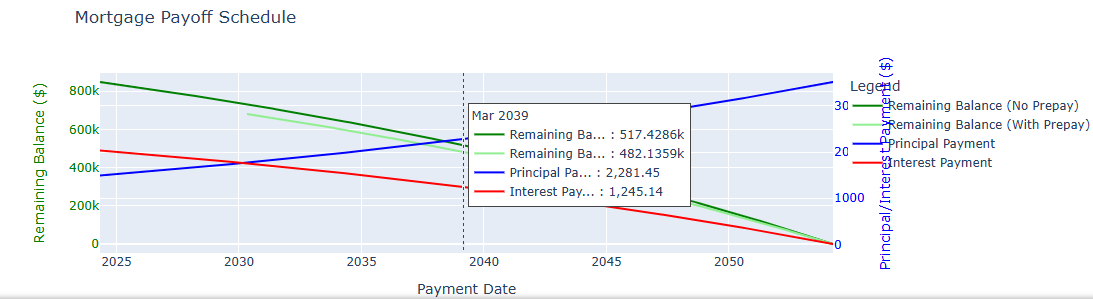

In [84]:

from IPython.display import Image
from IPython.core.display import HTML 
PATH = "C:\\Users\\ryan_\\Desktop\\Briefcase\\PDFs\\1-ALL PYTHON & R CODE SAMPLES\\A - GITHUB\Mortgage Payoff Schedule\\"
Image(filename = PATH + "1.png")


In [76]:

# In this final scenario, we will make the 'Prepay Year' and the 'Investment Return' completely dynamic so we can literally explore all 
# possible combinations of all posible scenarios. Below, you will see that 'Prepay Year' and the 'Investment Return' are dynamically claculated
# based on slider controls, and the charts/plots are updated according to the user's inputs/selections.

import pandas as pd
import datetime
import plotly.graph_objs as go
import ipywidgets as widgets
from ipywidgets import interact, FloatSlider, IntSlider

def calculate_monthly_payment(principal, annual_rate, years):
    monthly_rate = annual_rate / 12 / 100
    number_of_payments = years * 12
    monthly_payment = principal * (monthly_rate * (1 + monthly_rate)**number_of_payments) / ((1 + monthly_rate)**number_of_payments - 1)
    return monthly_payment

def generate_payoff_schedule(principal, annual_rate, years, start_date=None):
    monthly_payment = calculate_monthly_payment(principal, annual_rate, years)
    monthly_rate = annual_rate / 12 / 100
    number_of_payments = int(years * 12)
    
    balance = principal
    schedule = []
    
    for i in range(number_of_payments):
        interest = balance * monthly_rate
        principal_payment = monthly_payment - interest
        balance -= principal_payment
        
        if start_date:
            payment_date = start_date + pd.DateOffset(months=i)
        else:
            payment_date = f"Month {i+1}"
        
        schedule.append({
            "Payment Date": payment_date,
            "Payment": f"${monthly_payment:,.2f}",
            "Principal Payment": f"${principal_payment:,.2f}",
            "Interest Payment": f"${interest:,.2f}",
            "Remaining Balance": f"${balance:,.2f}"
        })
    
    return pd.DataFrame(schedule)

def calculate_investment_value(principal, annual_rate, years):
    return principal * (1 + annual_rate / 100) ** years

def update_analysis(prepay_year, investment_rate):
    prepay_months = prepay_year * 12

    # Generate payoff schedule with prepayment
    if prepay_months < len(schedule_no_prepay):
        # Balance just before prepayment
        balance_before_prepay = float(schedule_no_prepay.at[prepay_months - 1, 'Remaining Balance'].replace('$', '').replace(',', ''))
        balance_after_prepay = balance_before_prepay - prepay_amount

        # Adjust the calculation of remaining years after prepayment
        remaining_years_after_prepay = years - (prepay_months / 12)
        
        # Generate new schedule starting from the prepayment date
        schedule_with_prepay = generate_payoff_schedule(balance_after_prepay, annual_rate, remaining_years_after_prepay, start_date + pd.DateOffset(months=prepay_months))

        # Combine the schedules for the complete mortgage term
        schedule_combined = pd.concat([schedule_no_prepay.iloc[:prepay_months], schedule_with_prepay]).reset_index(drop=True)

        # Calculate interest saved by prepaying the mortgage
        interest_no_prepay = schedule_no_prepay["Interest Payment"].map(lambda x: float(x.replace('$', '').replace(',', ''))).sum()
        interest_with_prepay = schedule_combined["Interest Payment"].map(lambda x: float(x.replace('$', '').replace(',', ''))).sum()
        interest_saved = interest_no_prepay - interest_with_prepay

        # Calculate the investment value
        investment_years = years - prepay_year
        investment_value = calculate_investment_value(prepay_amount, investment_rate, investment_years)

        # Debug prints for intermediate values
        print(f"Interest without prepayment: ${interest_no_prepay:,.2f}")
        print(f"Interest with prepayment: ${interest_with_prepay:,.2f}")
        print(f"Interest saved: ${interest_saved:,.2f}")
        print(f"Future value of investment: ${investment_value:,.2f}")

        print('#' * 50)
        # Print summary
        print(f"Interest saved by prepaying the mortgage: ${interest_saved:,.2f}")
        print(f"Future value of investing ${prepay_amount:,.2f} at {investment_rate}% for {investment_years} years: ${investment_value:,.2f}")

        if interest_saved < investment_value:
            print('Make the investment. Do not prepay your mortgage')
        else:
            print('Prepay your mortgage. Do not make the investment.')
        
        # Plotting with Plotly
        fig = go.Figure()

        # Add Remaining Balance trace (without prepayment)
        fig.add_trace(go.Scatter(
            x=schedule_no_prepay['Payment Date'],
            y=schedule_no_prepay['Remaining Balance'].map(lambda x: float(x.replace('$', '').replace(',', ''))),
            mode='lines',
            name='Remaining Balance (No Prepay)',
            line=dict(color='green')
        ))

        # Add Remaining Balance trace (with prepayment)
        fig.add_trace(go.Scatter(
            x=schedule_combined['Payment Date'],
            y=schedule_combined['Remaining Balance'].map(lambda x: float(x.replace('$', '').replace(',', ''))),
            mode='lines',
            name='Remaining Balance (With Prepay)',
            line=dict(color='lightgreen')
        ))

        # Add Principal Payment trace (without prepayment)
        fig.add_trace(go.Scatter(
            x=schedule_no_prepay['Payment Date'],
            y=schedule_no_prepay['Principal Payment'].map(lambda x: float(x.replace('$', '').replace(',', ''))),
            mode='lines',
            name='Principal Payment (No Prepay)',
            yaxis='y2',
            line=dict(color='blue')
        ))

        # Add Interest Payment trace (without prepayment)
        fig.add_trace(go.Scatter(
            x=schedule_no_prepay['Payment Date'],
            y=schedule_no_prepay['Interest Payment'].map(lambda x: float(x.replace('$', '').replace(',', ''))),
            mode='lines',
            name='Interest Payment (No Prepay)',
            yaxis='y2',
            line=dict(color='red')
        ))

        # Add Principal Payment trace (with prepayment)
        fig.add_trace(go.Scatter(
            x=schedule_combined['Payment Date'],
            y=schedule_combined['Principal Payment'].map(lambda x: float(x.replace('$', '').replace(',', ''))),
            mode='lines',
            name='Principal Payment (With Prepay)',
            yaxis='y2',
            line=dict(color='darkblue', dash='dash')
        ))

        # Add Interest Payment trace (with prepayment)
        fig.add_trace(go.Scatter(
            x=schedule_combined['Payment Date'],
            y=schedule_combined['Interest Payment'].map(lambda x: float(x.replace('$', '').replace(',', ''))),
            mode='lines',
            name='Interest Payment (With Prepay)',
            yaxis='y2',
            line=dict(color='darkred', dash='dash')
        ))

        # Update layout to add secondary y-axis
        fig.update_layout(
            title='Mortgage Payoff Schedule',
            xaxis_title='Payment Date',
            yaxis=dict(
                title='Remaining Balance ($)',
                titlefont=dict(color='green'),
                tickfont=dict(color='green')
            ),
            yaxis2=dict(
                title='Principal/Interest Payment ($)',
                titlefont=dict(color='blue'),
                tickfont=dict(color='blue'),
                overlaying='y',
                side='right'
            ),
            legend_title='Legend',
            hovermode='x unified'
        )

        # Show plot
        fig.show()
    else:
        print("Error: The prepayment year exceeds the mortgage term.")

# Input variables and generate initial schedule
principal = float(input('Enter your loan amount: '))
annual_rate = float(input('Enter your annual interest rate: '))
years = int(input('Enter your mortgage term in years (30, 15, etc.): '))
date_entry = input('Enter a start date in YYYY-MM-DD format: ')
year, month, day = map(int, date_entry.split('-'))
start_date = datetime.date(year, month, day)
schedule_no_prepay = generate_payoff_schedule(principal, annual_rate, years, start_date)

# Prepayment details
prepay_amount = float(input('Enter your prepayment amount: '))

# Create sliders for prepay year and investment rate
interact(update_analysis, 
         prepay_year=IntSlider(min=1, max=years, step=1, value=2, description='Prepay Year'), 
         investment_rate=FloatSlider(min=-10.0, max=20.0, step=0.1, value=7.0, description='Investment Rate (%)'))


Enter your loan amount:  850000
Enter your annual interest rate:  2.875
Enter your mortgage term in years (30, 15, etc.):  30
Enter a start date in YYYY-MM-DD format:  2024-05-01
Enter your prepayment amount:  50000


interactive(children=(IntSlider(value=2, description='Prepay Year', max=30, min=1), FloatSlider(value=7.0, des…

<function __main__.update_analysis(prepay_year, investment_rate)>

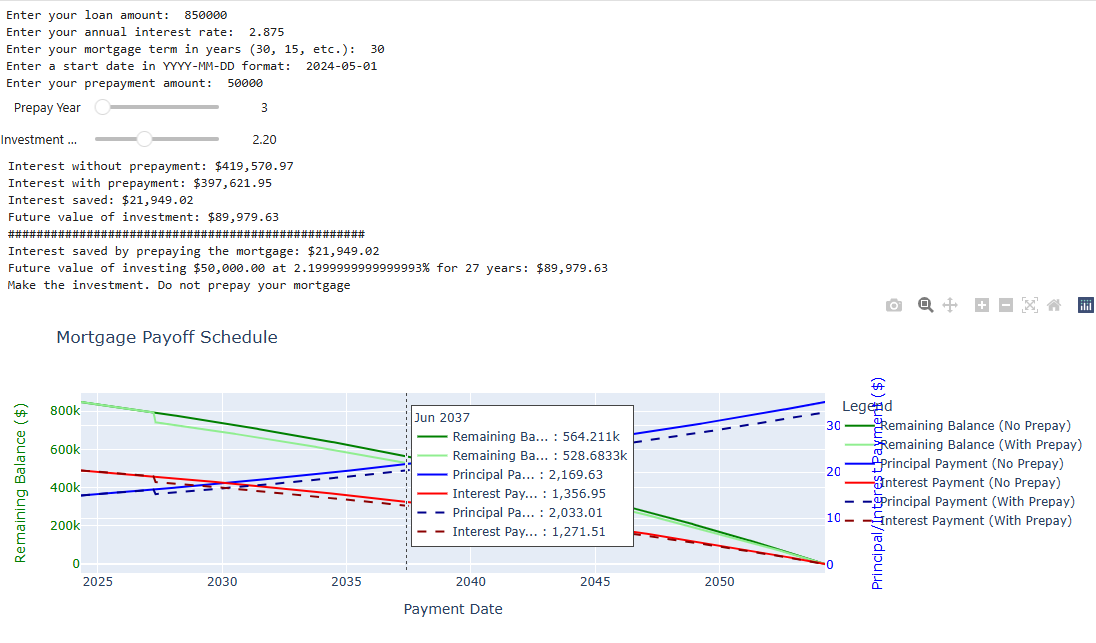

In [83]:

from IPython.display import Image
from IPython.core.display import HTML 
PATH = "C:\\Users\\ryan_\\Desktop\\Briefcase\\PDFs\\1-ALL PYTHON & R CODE SAMPLES\\A - GITHUB\Mortgage Payoff Schedule\\"
Image(filename = PATH + "2.png")


In [78]:

# The script is designed to help a user analyze their mortgage and the potential benefits of prepaying the mortgage versus investing the 
# same amount of money in an index fund, or mutual fund. It provides a detailed payoff schedule for the mortgage and calculates the cumulative 
# interest paid over time. Additionally, it allows for comparison between the interest saved by prepaying and the potential returns from investing.
# This knowledge equips users with the information needed to make intelligent financial decisions regarding their mortgage. The use of 
# visualizations enhances the clarity and accessibility of the financial data.

# Just for additional clarity, the prepayment amount can come from almost anywhere: proceeds from a life insurance policy, bonus from work, gift from
# rich older relative, winnings from a scratch off lottery ticket., etc. The analysis shows the benefit of prepaying your mortgage with a 
# sizable lump sum chunk of cash vs. taking the same lump sum of cash and investing it in some kind of asset that generates a return, which could be 
# either negative or positive (hopefully positive). 

# Key Components and Overall Insights
# 1.	Monthly Payment Calculations
# 2.	Payoff Schedule Generation
# 3.	Amortization Details
# 4.	Prepayment Analysis
# 5.	Investment Comparison
# 6.	Impact of a Prepayment
# 7.	Investment vs. Prepayment Analysis
# 8.	Visualizations


In [ ]:

# END!!!
